# Grouping Time Series Labels - An Anomaly Detection Example

In this notebook, we demonstrate how MIEDA can be used to aggregate time-series labels across multiple streams. This is useful in settings where one wishes to group similar behavior from multiple time series together as one label. When performed, identifying the time series which first exhibits anomalous behavior is simply a matter of finding the longest preceding intervel to the shared interval. 

We utilize the NASA Shuttle dataset for this task, which contains several time-series data: Rad Flow, Fpv Close, Fpv Open, High, Bypass, Bpv Close, and Bpv Open. 

## Imports

In [8]:
# let's make sure we are using the correct kernel 
import sys; sys.executable

'/Users/vconstan/Files/Projects/mieda/mieda/venv/bin/python'

In [9]:
from mieda.intervals import Merge

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

## Read Data

In [15]:
data_src = pathlib.Path("../data/shuttle/shuttle.trn")
columns = ["Time", "Rad Flow", "Fpv Close", "Fpv Open", "High", "Bypass", "Bpv Close", "Bpv Open", "Class"]

In [17]:
shuttle_df = pd.read_csv(data_src, delimiter=' ', names=columns)
shuttle_df.head()

,Time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open,Class
50,21,77,0,28,0,27,48,22,2
55,0,92,0,0,26,36,92,56,4
53,0,82,0,52,-5,29,30,2,1
37,0,76,0,28,18,40,48,8,1
37,0,79,0,34,-26,43,46,2,1


In [18]:
shuttle_df.shape

(43500, 9)

/Users/vconstan/Files/Projects/mieda/mieda/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

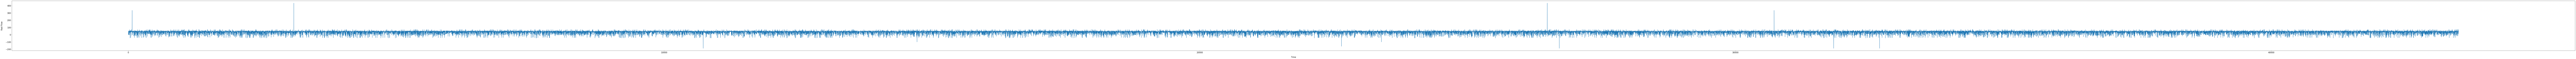

In [28]:
plt.cla()
plt.clf()
fig = plt.figure(figsize=(350,7))
ax = plt.axes()
ax.plot(range(0, shuttle_df.shape[0]), shuttle_df["Fpv Open"])
plt.xlabel("Time", labelpad=20)
plt.ylabel("Rad Flow", labelpad=20)
plt.rcParams["font.size"] = "15"
fig.show()

In [29]:
# TODO: use plotly or matplotlib to do boxes in the background for the class and anomaly detection labels 
# TODO: use LoOP to identify the simple anomalies in the data. Do we get the rest? 
# TODO: use mieda to merge the detected intervals into one labels 
# TODO: illustrate how we can now find the sensor that reacts first 